In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading a data set
df = pd.read_csv('Datasets/carseats.csv')
df

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# About Carseats.csv Dataset:

It contains 400 records and 12 features

Sales is the response variable and all other features are predictors

In [3]:
df.shape

(400, 12)

In [4]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
#dropping Unnames : 0 column
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
#checking for missing values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
#check the data type
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
#checking the unique value in each categorial column
for col in df.columns:
    if(df[col].dtype == 'O'):
        print(("Unique values in {} = {}").format(col,df[col].unique()))

Unique values in ShelveLoc = ['Bad' 'Good' 'Medium']
Unique values in Urban = ['Yes' 'No']
Unique values in US = ['Yes' 'No']


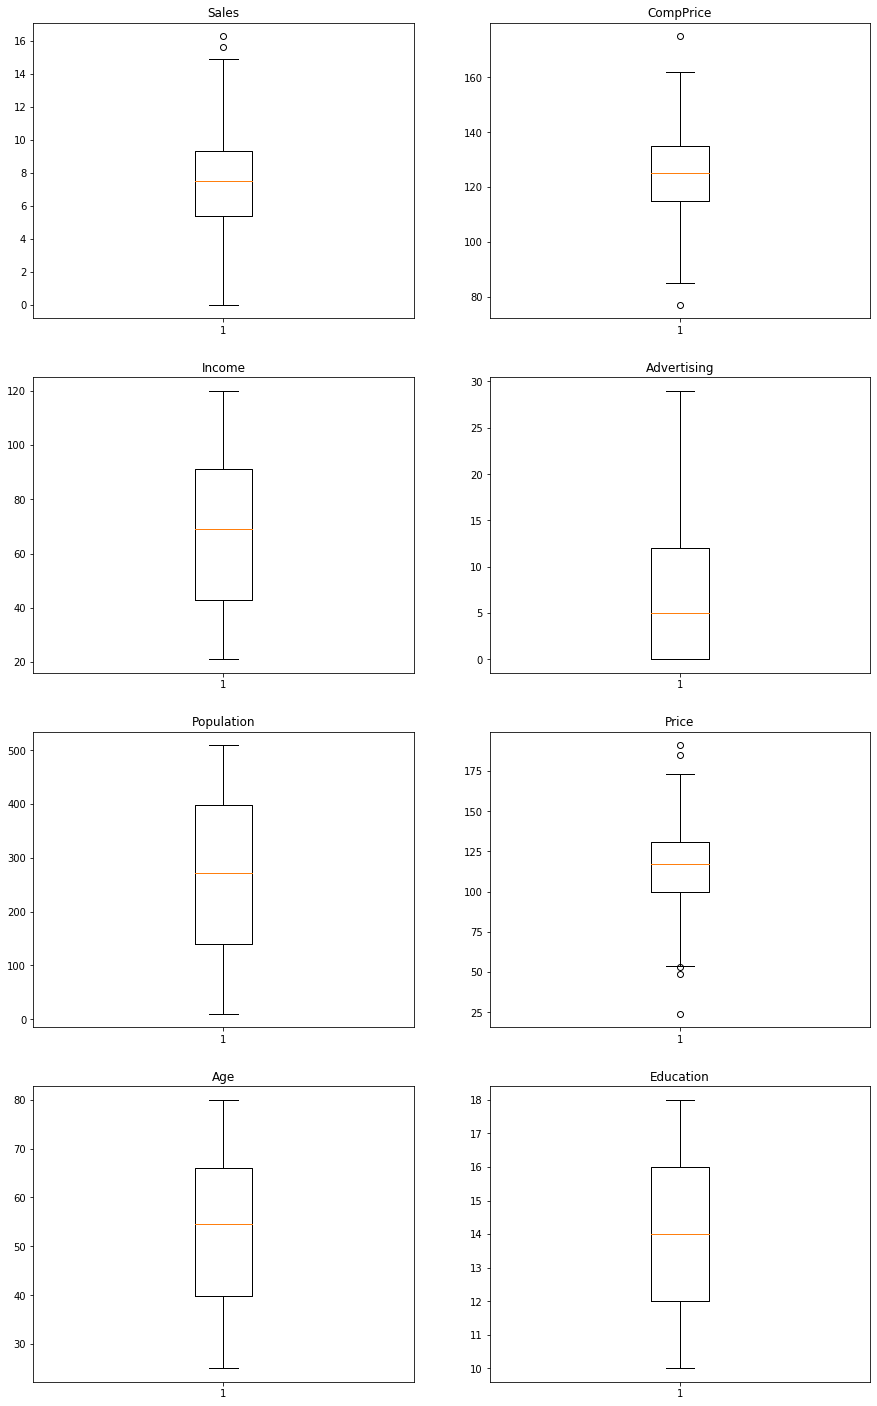

In [10]:
#checking for outliers in numerical columns
plt.figure(figsize = (15,25))
count = 1
for col in df.columns:
    if(df[col].dtype != 'O'):
        plt.subplot(4,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count += 1
plt.show()


In [11]:
#check for correlation
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [12]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
#applying label encoding on shelveloc column
my_dict = {
    'Bad' : 0,
    'Medium' : 1,
    'Good': 2
}

In [14]:
df['ShelveLoc_new'] = df['ShelveLoc'].map(my_dict)

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_new
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [16]:
#dropping old ShelveLoc Column
df.drop('ShelveLoc',axis = 1,inplace = True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_new
0,9.50,138,73,11,276,120,42,17,Yes,Yes,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,38,13,Yes,No,0


In [17]:
#one hot encoding the other two columns and dropping the first two rows
df2 = pd.get_dummies(df,drop_first = True)

In [18]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,2,1,1
2,10.06,113,35,10,269,80,59,12,1,1,1
3,7.40,117,100,4,466,97,55,14,1,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0


In [19]:
#split x and y
x = df2.iloc[:,1:].values
y = df2.iloc[:,0].values


In [20]:
x.shape

(400, 10)

In [21]:
y.shape

(400,)

In [22]:
#splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [23]:
#creating linear regresion model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
#fitting the training data
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#predictions
y_pred = model.predict(x_test)

In [26]:
#checking the r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.800191679108424